# LINEAR REGRESSION

## SIMPLE LINEAR REGRESSION


In [1]:
# Importing the libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
!pip install openpyxl

                                              0.0/250.9 kB ? eta -:--:--
     ------------------                     122.9/250.9 kB 2.4 MB/s eta 0:00:01
     -------------------------------------- 250.9/250.9 kB 3.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Loading the data:

df=pd.read_excel(r"linear_reg.xlsx",
             header=4,usecols=[1,2],nrows=16)
df.sample(2)

,interest rate (%),home price
5,7.3,173200
10,6.9,188100


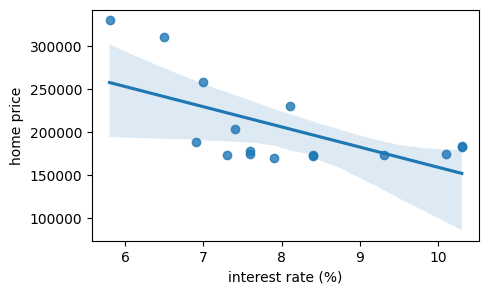

In [6]:
# Visual Representation:

plt.figure(figsize=(5,3))
sns.regplot(x=df['interest rate (%)'],y=df['home price'])
plt.show()

In [7]:
# Identifying the variables:

x=df[['interest rate (%)']].values
y=df['home price']

In [8]:
# Training the machine

In [9]:
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(x,y)
y_pred=model.predict(x)
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.3845951532051972

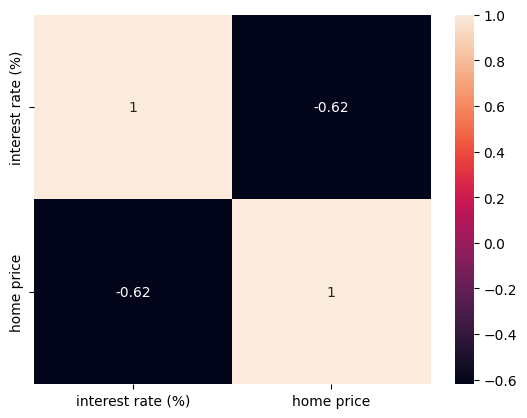

In [10]:
# Correlation between X and Y
sns.heatmap(df.corr(),annot=True)
plt.show()

## MULTI LINEAR REGRESSION

In [11]:
df1=pd.read_excel(r"linear_reg.xlsx",sheet_name=1,
                 header=3,nrows=27,usecols=[1,2,3,4,5])
df1.sample(2)

,Number of weekly riders,Price per week,Population of city,Monthly income of riders,Average parking rates per month
9,173920,30,1705000,9200,80
15,159200,40,1630000,11830,105


In [12]:
# Identify the features and the target:

x=df1.iloc[:,1:5]
y=df1['Number of weekly riders']

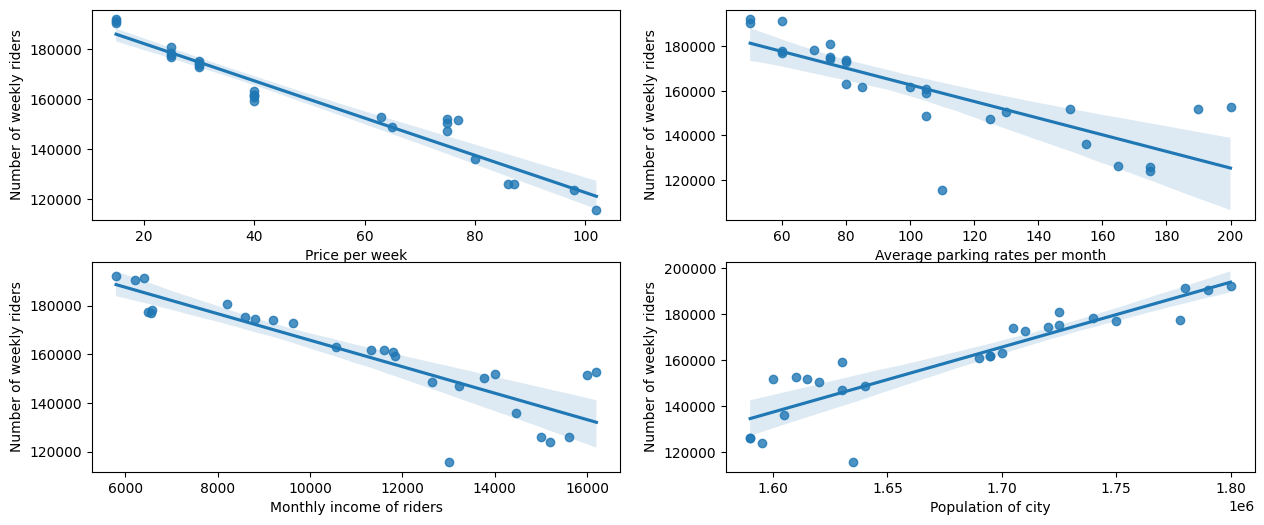

In [13]:
# Vizual representation:
plt.figure(figsize=(15,6))

plt.subplot(2,2,1)
sns.regplot(x=df1['Price per week'],y=df1['Number of weekly riders'])

plt.subplot(2,2,2)
sns.regplot(x=df1['Average parking rates per month'],y=df1['Number of weekly riders'])

plt.subplot(2,2,3)
sns.regplot(x=df1['Monthly income of riders'],y=df1['Number of weekly riders'])

plt.subplot(2,2,4)
sns.regplot(x=df1['Population of city'],y=df1['Number of weekly riders'])

plt.show()

In [14]:
# Training:

model=LinearRegression().fit(x,y)

In [15]:
y_pred=model.predict(x)
r2_score(y,y_pred)

0.945492415531452

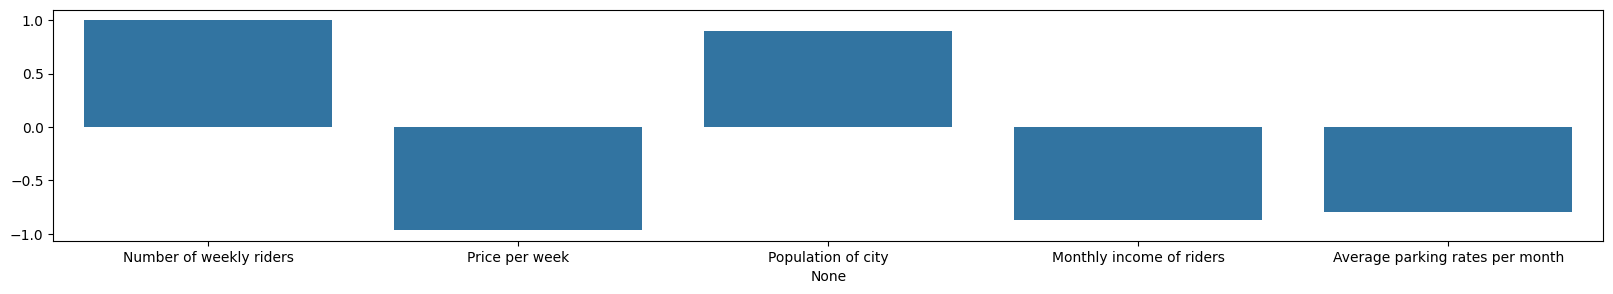

In [16]:
plt.figure(figsize=(20,3))
corr_mat=df1.corr()['Number of weekly riders']
sns.barplot(x=corr_mat.keys(),y=corr_mat.values)
plt.show()

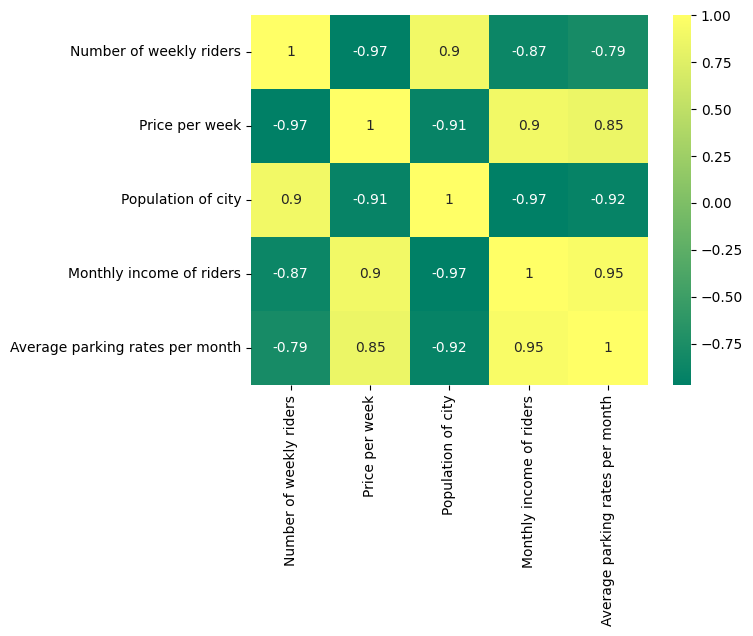

In [17]:
sns.heatmap(df1.corr(),annot=True,cmap='summer')
plt.show()

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
print('MAE=',mean_absolute_error(y,y_pred))
print('MAPE=',mean_absolute_percentage_error(y,y_pred))
print('MSE=',mean_squared_error(y,y_pred))
print('RMSE=',np.sqrt(mean_squared_error(y,y_pred)))

MAE= 3919.5518876230362
MAPE= 0.02609290850319031
MSE= 23816090.543112677
RMSE= 4880.173208310611
